In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import time
import importlib

In [2]:
t1 = time.perf_counter()
with open("./pkls/raw_hist_list.pkl", "rb") as f:
    raw_hist_list = pickle.load(f)[1:]# length 64
with open("./pkls/ignis_mitigator_info.pkl", "rb") as f:
    ignis_mitigator_info = pickle.load(f)
with open("./pkls/delta_mitigator_info.pkl", "rb") as f:
    delta_mitigator_info = pickle.load(f)
with open("./pkls/lnp_mitigator_info.pkl", "rb") as f:
    lnp_mitigator_info = pickle.load(f)
with open("./pkls/mooney01_mitigator_info.pkl", "rb") as f:
    mooney01_mitigator_info = pickle.load(f)
with open("./pkls/mooney001_mitigator_info.pkl", "rb") as f:
    mooney001_mitigator_info = pickle.load(f)
with open("./pkls/nation_lu_mitigator_info.pkl", "rb") as f:
    nation_lu_mitigator_info = pickle.load(f)
with open("./pkls/nation_bicgstab_mitigator_info.pkl", "rb") as f:
    nation_bicgstab_mitigator_info = pickle.load(f)
with open("./pkls/mthree_lu_mitigator_info.pkl", "rb") as f:
    mthree_lu_mitigator_info = pickle.load(f)
with open("./pkls/mthree_gmres_mitigator_info.pkl", "rb") as f:
    mthree_gmres_mitigator_info = pickle.load(f)
t2 = time.perf_counter()
print(t2 - t1, "s")

40.566958013 s


In [3]:
max_size = 65
max_length = 64
ignis_length = len(ignis_mitigator_info)
nation_bicgstab_length = len(nation_bicgstab_mitigator_info)
mooney01_length = len(mooney01_mitigator_info)
mooney001_length = len(mooney001_mitigator_info)

# Times

In [4]:
ignis_total_times = [ignis_mitigator_info[i]["times"]["total"] for i in range(ignis_length)]
delta_total_times = [delta_mitigator_info[i]["times"]["total"] for i in range(max_length)]
lnp_total_times = [lnp_mitigator_info[i]["times"]["total"] for i in range(max_length)]
mooney01_total_times = [mooney01_mitigator_info[i]["times"]["total"] for i in range(mooney01_length)]
mooney001_total_times = [mooney001_mitigator_info[i]["times"]["total"] for i in range(mooney001_length)]
nation_lu_total_times = [nation_lu_mitigator_info[i]["times"]["total"] for i in range(max_length)]
nation_bicgstab_total_times = [nation_bicgstab_mitigator_info[i]["times"]["total"] for i in range(nation_bicgstab_length)]
mthree_lu_total_times = [mthree_lu_mitigator_info[i]["times"]["total"] for i in range(max_length)]
mthree_gmres_total_times = [mthree_gmres_mitigator_info[i]["times"]["total"] for i in range(max_length)]

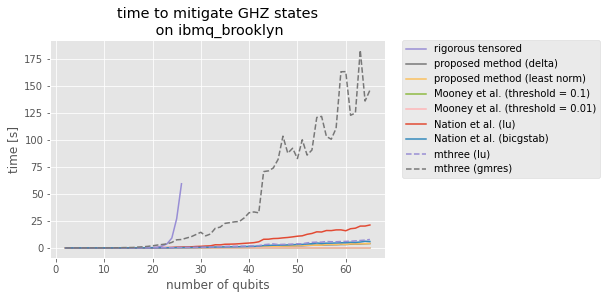

In [5]:
plt.clf()
plt.style.use('ggplot')
plt.plot(range(2, ignis_length + 2), ignis_total_times, label="rigorous tensored", color="C2")
plt.plot(range(2, max_length + 2), delta_total_times, label="proposed method (delta)", color="C3")
plt.plot(range(2, max_length + 2), lnp_total_times, label="proposed method (least norm)", color="C4")
plt.plot(range(2, mooney01_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.1)", color="C5")
plt.plot(range(2, mooney001_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.01)", color="C6")
plt.plot(range(2, max_length + 2), nation_lu_total_times, label="Nation et al. (lu)", color="C7")
plt.plot(range(2, nation_bicgstab_length + 2), nation_bicgstab_total_times, label="Nation et al. (bicgstab)", color="C8")
plt.plot(range(2, max_length + 2), mthree_lu_total_times, label="mthree (lu)", color="C9", linestyle = "dashed")
plt.plot(range(2, max_length + 2), mthree_gmres_total_times, label="mthree (gmres)", color="C10", linestyle = "dashed")
plt.xlabel("number of qubits")
plt.ylabel("time [s]")
plt.title("time to mitigate GHZ states\n on ibmq_brooklyn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

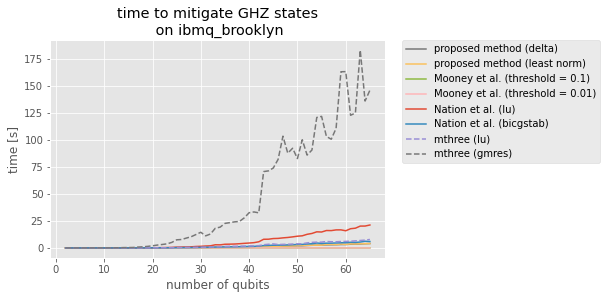

In [6]:
plt.clf()
plt.style.use('ggplot')
# plt.plot(range(2, ignis_length + 2), ignis_total_times, label="rigorous tensored", color="C2")
plt.plot(range(2, max_length + 2), delta_total_times, label="proposed method (delta)", color="C3")
plt.plot(range(2, max_length + 2), lnp_total_times, label="proposed method (least norm)", color="C4")
plt.plot(range(2, mooney01_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.1)", color="C5")
plt.plot(range(2, mooney001_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.01)", color="C6")
plt.plot(range(2, max_length + 2), nation_lu_total_times, label="Nation et al. (lu)", color="C7")
plt.plot(range(2, nation_bicgstab_length + 2), nation_bicgstab_total_times, label="Nation et al. (bicgstab)", color="C8")
plt.plot(range(2, max_length + 2), mthree_lu_total_times, label="mthree (lu)", color="C9", linestyle = "dashed")
plt.plot(range(2, max_length + 2), mthree_gmres_total_times, label="mthree (gmres)", color="C10", linestyle = "dashed")
plt.xlabel("number of qubits")
plt.ylabel("time [s]")
plt.title("time to mitigate GHZ states\n on ibmq_brooklyn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

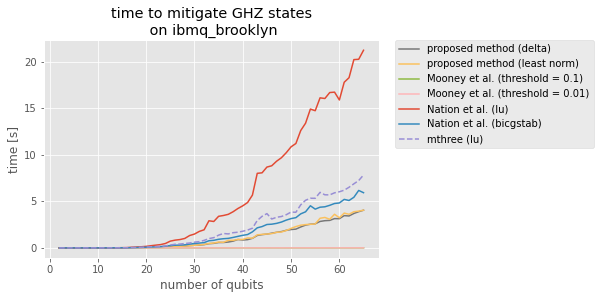

In [7]:
plt.clf()
plt.style.use('ggplot')
# plt.plot(range(2, ignis_length + 2), ignis_total_times, label="rigorous tensored", color="C2")
plt.plot(range(2, max_length + 2), delta_total_times, label="proposed method (delta)", color="C3")
plt.plot(range(2, max_length + 2), lnp_total_times, label="proposed method (least norm)", color="C4")
plt.plot(range(2, mooney01_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.1)", color="C5")
plt.plot(range(2, mooney001_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.01)", color="C6")
plt.plot(range(2, max_length + 2), nation_lu_total_times, label="Nation et al. (lu)", color="C7")
plt.plot(range(2, nation_bicgstab_length + 2), nation_bicgstab_total_times, label="Nation et al. (bicgstab)", color="C8")
plt.plot(range(2, max_length + 2), mthree_lu_total_times, label="mthree (lu)", color="C9", linestyle = "dashed")
# plt.plot(range(2, max_length + 2), mthree_gmres_total_times, label="mthree (gmres)", color="C10", linestyle = "dashed")
plt.xlabel("number of qubits")
plt.ylabel("time [s]")
plt.title("time to mitigate GHZ states\n on ibmq_brooklyn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

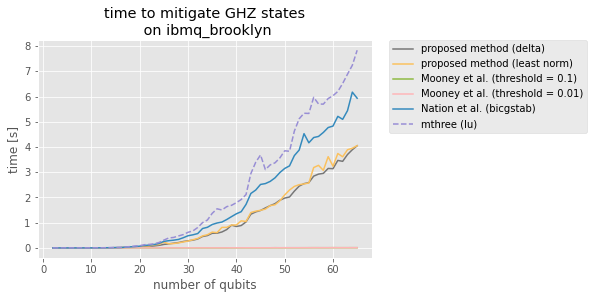

In [8]:
plt.clf()
plt.style.use('ggplot')
# plt.plot(range(2, ignis_length + 2), ignis_total_times, label="rigorous tensored", color="C2")
plt.plot(range(2, max_length + 2), delta_total_times, label="proposed method (delta)", color="C3")
plt.plot(range(2, max_length + 2), lnp_total_times, label="proposed method (least norm)", color="C4")
plt.plot(range(2, mooney01_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.1)", color="C5")
plt.plot(range(2, mooney001_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.01)", color="C6")
#  plt.plot(range(2, max_length + 2), nation_lu_total_times, label="Nation et al. (lu)", color="C7")
plt.plot(range(2, nation_bicgstab_length + 2), nation_bicgstab_total_times, label="Nation et al. (bicgstab)", color="C8")
plt.plot(range(2, max_length + 2), mthree_lu_total_times, label="mthree (lu)", color="C9", linestyle = "dashed")
# plt.plot(range(2, max_length + 2), mthree_gmres_total_times, label="mthree (gmres)", color="C10", linestyle = "dashed")
plt.xlabel("number of qubits")
plt.ylabel("time [s]")
plt.title("time to mitigate GHZ states\n on ibmq_brooklyn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

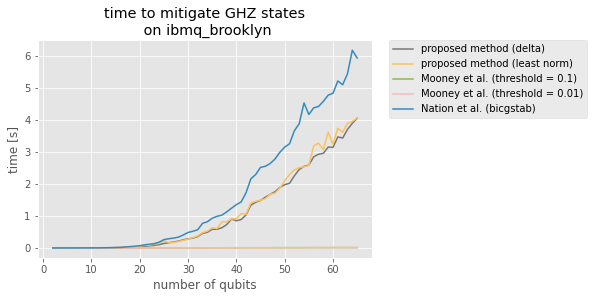

In [9]:
plt.clf()
plt.style.use('ggplot')
# plt.plot(range(2, ignis_length + 2), ignis_total_times, label="rigorous tensored", color="C2")
plt.plot(range(2, max_length + 2), delta_total_times, label="proposed method (delta)", color="C3")
plt.plot(range(2, max_length + 2), lnp_total_times, label="proposed method (least norm)", color="C4")
plt.plot(range(2, mooney01_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.1)", color="C5")
plt.plot(range(2, mooney001_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.01)", color="C6")
#  plt.plot(range(2, max_length + 2), nation_lu_total_times, label="Nation et al. (lu)", color="C7")
plt.plot(range(2, nation_bicgstab_length + 2), nation_bicgstab_total_times, label="Nation et al. (bicgstab)", color="C8")
# plt.plot(range(2, max_length + 2), mthree_lu_total_times, label="mthree (lu)", color="C9", linestyle = "dashed")
# plt.plot(range(2, max_length + 2), mthree_gmres_total_times, label="mthree (gmres)", color="C10", linestyle = "dashed")
plt.xlabel("number of qubits")
plt.ylabel("time [s]")
plt.title("time to mitigate GHZ states\n on ibmq_brooklyn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [17]:
[len(list(ignis_mitigator_info[i]["x_s"])) for i in range(ignis_length)]

[4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096,
 8192,
 16384,
 32768,
 65536,
 131072,
 262144,
 524288,
 1048576,
 2097152,
 4194304,
 8388608,
 16777216,
 33554432,
 67108864]